# SENTIMENT ANALYSIS

## Preprocessing 

In [151]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import spacy

import warnings
warnings.filterwarnings('ignore')

In [152]:
tweets = pd.read_csv('tweets_csv.csv')
tweets2 = pd.read_excel('data_excel.xlsx')

In [153]:
df=pd.concat([tweets,tweets2],axis=0)
df = df[df['lang'] == 'en']

In [154]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0','likeCount','retweetCount','user','lang'])
df = df.reset_index()
df = df.drop(columns=['index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9182 non-null   object
 1   rawContent  9182 non-null   object
 2   place       2973 non-null   object
 3   hashtags    9153 non-null   object
dtypes: object(4)
memory usage: 287.1+ KB


In [155]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [156]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [157]:
df['Content'] = df['rawContent'].apply(lambda x: strip_all_entities(strip_links(x))) #removing links, hashtags, mentions

In [158]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))  #lowercase
df['Content'] = df['Content'].str.replace('[^\w\s]','')  #removing punctuation
df['Content'].head()

0       opened the shutters of dam beautiful amp scary
1                                it s rising stay safe
2                             more pics from the scene
3    dams third shutter opened for first time in 26...
4                     idukki dam opened after 26 years
Name: Content, dtype: object

In [159]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Content'] = df['Content'].apply(lambda x: remove_emoji(x))

In [160]:
stop = stopwords.words('english')
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,date,rawContent,place,hashtags,Content
0,2018-08-01 07:42:50,Opened the shutters of #Malampuzha dam #Palakk...,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","['Malampuzha', 'Palakkad', 'KeralaFlood']",opened shutters dam beautiful amp scary
1,2018-08-09 05:02:39,It's rising. Stay safe. #Keralarains#kalady ht...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,rising stay safe
2,2018-08-09 05:42:24,More pics from the scene. #kalady#keralaflood ...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,pics scene
3,2018-08-09 07:07:00,#idukki dams third shutter opened for first ti...,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","['idukki', 'Kerala', 'periyar', 'aluva', 'Kera...",dams third shutter opened first time 26 years ...
4,2018-08-09 07:26:31,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","['IDUKKI', 'keralarains']",idukki dam opened 26 years
5,2018-08-09 07:40:32,#kerala stay safe #keralarains #GodsOwnCountry,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","['kerala', 'keralarains', 'GodsOwnCountry']",stay safe
6,2018-08-09 09:21:30,"#KeralaFloods so, national media again suffers...","{'id': '6d86f195adaa42fb', 'fullName': 'Saidap...",['KeralaFloods'],national media suffers tyranny distance covera...
7,2018-08-09 09:25:21,Heavy rains wash away Railway tracks in Palakk...,"{'id': '03b7ea94ef68e9d7', 'fullName': 'Mylapo...",['keralarains'],heavy rains wash away railway tracks palakkad
8,2018-08-09 10:03:02,Avoid roads like these as heavy rain lashing i...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['Kerala', 'KeralaFloods']",avoid roads like heavy rain lashing hilly regi...
9,2018-08-09 10:07:03,Guidelines for tourists in #KeralaFloods. Thi...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['KeralaFloods', 'Kerala']",guidelines tourists things avoid travelling he...


In [161]:
#lemmatization / removing grammar tense.
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['Content']= df['Content'].apply(space)
df.head(20)

,date,rawContent,place,hashtags,Content
0,2018-08-01 07:42:50,Opened the shutters of #Malampuzha dam #Palakk...,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","['Malampuzha', 'Palakkad', 'KeralaFlood']",open shutter dam beautiful amp scary
1,2018-08-09 05:02:39,It's rising. Stay safe. #Keralarains#kalady ht...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,rise stay safe
2,2018-08-09 05:42:24,More pics from the scene. #kalady#keralaflood ...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,pic scene
3,2018-08-09 07:07:00,#idukki dams third shutter opened for first ti...,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","['idukki', 'Kerala', 'periyar', 'aluva', 'Kera...",dams third shutter open first time 26 year flo...
4,2018-08-09 07:26:31,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","['IDUKKI', 'keralarains']",idukki dam open 26 year
5,2018-08-09 07:40:32,#kerala stay safe #keralarains #GodsOwnCountry,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","['kerala', 'keralarains', 'GodsOwnCountry']",stay safe
6,2018-08-09 09:21:30,"#KeralaFloods so, national media again suffers...","{'id': '6d86f195adaa42fb', 'fullName': 'Saidap...",['KeralaFloods'],national medium suffer tyranny distance covera...
7,2018-08-09 09:25:21,Heavy rains wash away Railway tracks in Palakk...,"{'id': '03b7ea94ef68e9d7', 'fullName': 'Mylapo...",['keralarains'],heavy rain wash away railway track palakkad
8,2018-08-09 10:03:02,Avoid roads like these as heavy rain lashing i...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['Kerala', 'KeralaFloods']",avoid road like heavy rain lash hilly region f...
9,2018-08-09 10:07:03,Guidelines for tourists in #KeralaFloods. Thi...,"{'id': '232099930cfd4364', 'fullName': 'Munnar...","['KeralaFloods', 'Kerala']",guideline tourist thing avoid travel heavy rain


## Analysis

In [162]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [163]:
df['Sentiment'] = ''
df['Score'] = ''

In [164]:
analyser = SentimentIntensityAnalyzer()
for i in range(9182):
    content = df['Content'][i]
    pol = analyser.polarity_scores(content)
    df['Score'][i] = pol['compound']
    if pol['compound'] >= 0.1 :
        df['Sentiment'][i] = 'Positive'
    elif pol['compound'] <= - 0.1 :
        df['Sentiment'][i] = 'Negative'
    else :
        df['Sentiment'][i] = 'Neutral'

In [165]:
df['Score']

0       0.1779
1       0.4404
2          0.0
3          0.0
4          0.0
         ...  
9177    0.9231
9178     0.836
9179    0.6808
9180    0.6124
9181   -0.8402
Name: Score, Length: 9182, dtype: object

In [166]:
df['Sentiment']

0       Positive
1       Positive
2        Neutral
3        Neutral
4        Neutral
          ...   
9177    Positive
9178    Positive
9179    Positive
9180    Positive
9181    Negative
Name: Sentiment, Length: 9182, dtype: object

In [167]:
df['Sentiment'].value_counts()

Sentiment
Positive    5562
Neutral     1855
Negative    1765
Name: count, dtype: int64

## Visualisation

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

<Axes: xlabel='Score', ylabel='Count'>

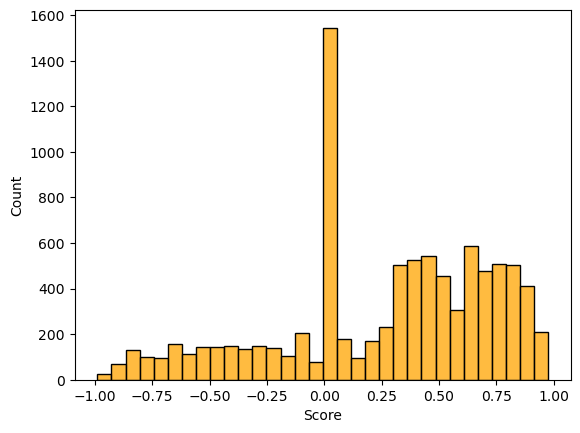

In [169]:
sns.histplot(data = df['Score'], color = "orange")

In [170]:
df.columns

Index(['date', 'rawContent', 'place', 'hashtags', 'Content', 'Sentiment',
       'Score'],
      dtype='object')

In [171]:
df['totalwords'] = df['Content'].str.split().str.len()
df[['Content','totalwords']]

,Content,totalwords
0,open shutter dam beautiful amp scary,6
1,rise stay safe,3
2,pic scene,2
3,dams third shutter open first time 26 year flo...,10
4,idukki dam open 26 year,5
...,...,...
9177,sir please help request pls send relief materi...,12
9178,2 56 inch chest pm aireal survey grant peanut ...,16
9179,yes proof considerate ppl kerela animal hear r...,16
9180,use tool promotion well do people good standar...,10


<Axes: xlabel='totalwords', ylabel='Count'>

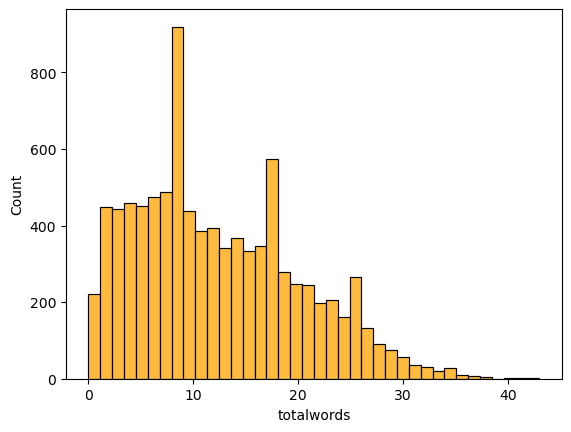

In [172]:
sns.histplot(data = df['totalwords'], color = "orange")

Most tweets comprise of around 5 - 15 words

In [173]:
wordCounter = Counter(" ".join(df["Content"]).split()).most_common(10)
df2 = pd.DataFrame(wordCounter)
df2

,0,1
0,kerala,3109
1,help,2123
2,people,1587
3,flood,1539
4,relief,1364
5,donate,1333
6,please,1258
7,need,1185
8,amp,919
9,rescue,730


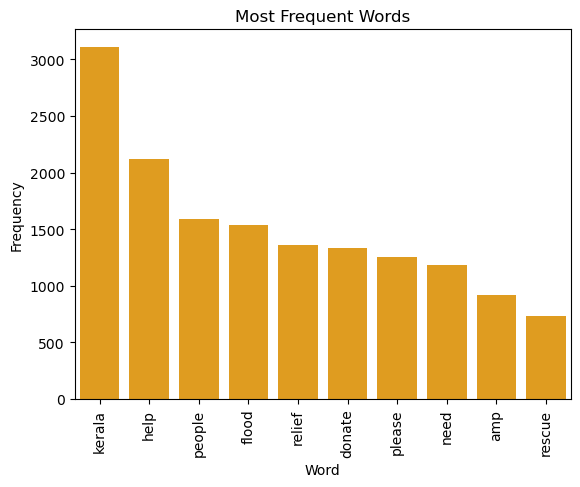

In [174]:
sns.barplot(data = df2, x= df2[0],y=df2[1], color="orange")
plt.xlabel("Word")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.title("Most Frequent Words")
plt.show()

## Topic Modeling

In [175]:
import contractions

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models

In [176]:
newStopWords = ['kerala','let','hi','pls','sir','hello','u']
stop.extend(newStopWords)
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [177]:
def expand_contractions(text):
   expanded_words = [] 
   for word in text.split():
      expanded_words.append(contractions.fix(word)) 
   return ' '.join(expanded_words)

In [178]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
        if word!='':
            words.append(word)
        return words
#storing the generated tokens in a new column named 'words'
df['tokens']=df.Content.apply(generate_tokens)

In [179]:
def create_dictionary(words):
    return corpora.Dictionary(words)
#passing the dataframe column having tokens as the argument
id2word=create_dictionary(df.tokens)
print(id2word)

Dictionary<2218 unique tokens: ['open', 'rise', 'pic', 'dams', 'idukki']...>


In [180]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
       corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df.tokens,id2word)
print(df.tokens[0])
print(corpus[0])

['open']
[(0, 1)]


In [181]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=100 )

In [182]:
def get_lda_topics(model, num_topics, top_n_words):
    word_dict = {}
    for i in range(num_topics):
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)]
 
    return pd.DataFrame(word_dict)
get_lda_topics(lda_model,5,5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,flood,please,dear,thank,donate
1,people,need,small,help,pray
2,karnataka,good,govt,cm,great
3,friend,anyone,update,guy,indian
4,heavy,hope,rt,state,relief


In [183]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.100763  0.273541       1        1  21.674544
4     -0.087680 -0.289122       2        1  20.803617
0     -0.279526 -0.004508       3        1  19.225704
1      0.222322 -0.154413       4        1  19.198684
3      0.245647  0.174503       5        1  19.097451, topic_info=        Term        Freq       Total Category  logprob  loglift
47    please  277.000000  277.000000  Default  30.0000  30.0000
150    thank  186.000000  186.000000  Default  29.0000  29.0000
79      need  163.000000  163.000000  Default  28.0000  28.0000
140   donate  149.000000  149.000000  Default  27.0000  27.0000
50     flood  104.000000  104.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
630      man   10.425792   11.091803   Topic5  -5.1219   1.5937
640       rs    9.934969   10.601275   Topic5  -5.1702   1.5907
255    share   22.277786   23.785816   Topic5  -4.3626   1.5901
592     view    9.718179   10.385628   Topic5  -5.1922   1.5892
269  current    9.369362   10.036240   Topic5  -5.2288   1.5869

[189 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
790       2  0.989323           1
546       3  0.971798  absolutely
2177      4  0.916637       acute
714       3  0.957472         air
360       5  0.966143        also
...     ...       ...         ...
232       2  0.963432         way
278       3  0.982193        well
412       1  0.966732       would
409       3  0.951403         yes
376       4  0.953130           ’

[175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

In [184]:
#pyLDAvis.save_html(vis, 'lda.html')

### VIEW GRAPH : http://htmlpreview.github.io/?https://github.com/abh1n4v/Infrastructure-Resilience/blob/master/Analysis/lda.html

Most relevant terms for each topic:
1. Contribution, donation, collect, fisherman
2. Donate, pray, request, rescue, urgently, relief
3. Flood, people, heavy, someone, volunteer
4. Please, need, good, hope, salute
5. Thank, help, respect, heart, share

From the above topic model it can be seen that the major topics of discussion in the tweets taken during the Kerala Floods include heavy usage of words such as:  
    please, thank, donate, pray, need, hope, people, request, help, share, contribute 

By analyzing the themes and emotions present in the tweets, we can gain a deeper understanding of how people are responding to the floods and the types of support and resources that are needed.

Based on this topic model, it is evident that people are expressing a range of emotions.  

Phrases such as 'please', 'donate' etc suggest that they are feeling a sense of **urgency and desperation.**  
The people are trying to reach out to others for assistance or to raise awarness about the impact of the flood.  
These words also indicate that people are actively seeking help, whether it be in the form of donations, volunteers, or other resources  

At the same time, phrases such as 'thank', 'hope', 'pray' suggest that people are also expressing **gratitute and optimism** in the face of adversity.  
They may be thanking those who have already provided assistance or expressing hope for the future; they are searching for a **silver lining** amidst chaos.  
These words also indicate a sense of community and togetherness, as people may be coming together to support one another during a difficult time.  

All these indicates a strong sense of **community resilience**, as people are coming together to support one another and work towards a common goal of recovering from the floods.  
When people have a **positive outlook** and are able to find ways to adapt and recover from a disaster, they are more likely to be able to rebuild and move forward.

In terms of infrastructure resilience, the use of words like 'need', 'share', and 'contribute' suggest that there may be gaps in the existing infrastructure or resources needed to support those affected by the floods. This highlights the importance of investing in infrastructure and resources that can help communities better prepare for and respond to disasters like floods. By identifying these gaps and needs through sentiment analysis, decision-makers can better understand where to allocate resources and improve infrastructure to support community resilience.
